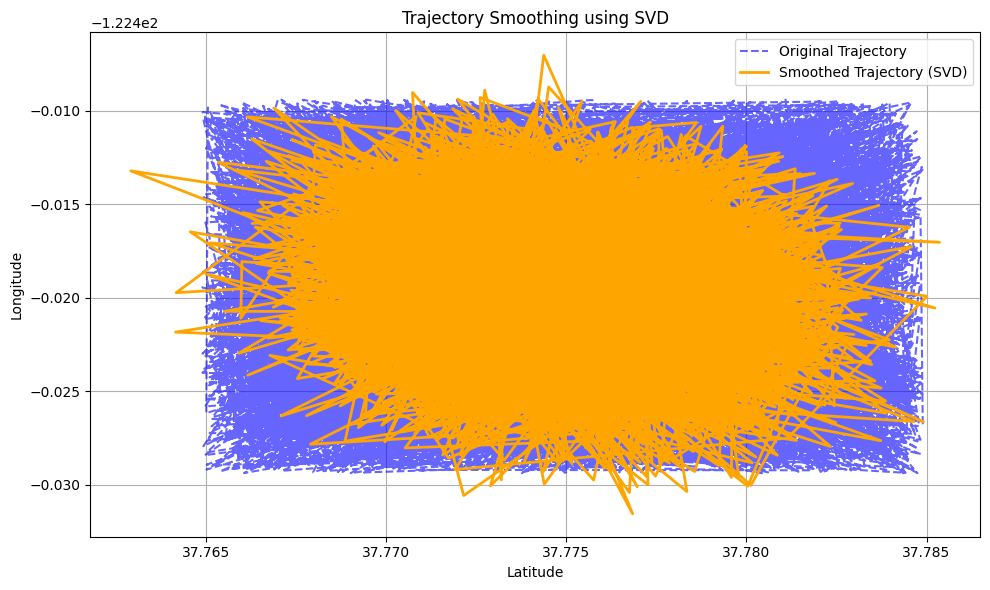

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Load dataset
df = pd.read_csv('uav_navigation_dataset.csv')

# Define sensor data matrix (including trajectory + IMU + LiDAR + speed)
sensor_columns = ['latitude', 'longitude', 'altitude', 
                  'imu_acc_x', 'imu_acc_y', 'imu_acc_z', 
                  'imu_gyro_x', 'imu_gyro_y', 'imu_gyro_z',
                  'lidar_distance', 'speed']
A = df[sensor_columns].values

# Normalize the data before applying SVD (helps with scale)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
A_scaled = scaler.fit_transform(A)

# Apply SVD
svd = TruncatedSVD(n_components=5)  # Increase components if reconstruction quality is low
A_reduced = svd.fit_transform(A_scaled)
A_reconstructed = svd.inverse_transform(A_reduced)

# Inverse transform the scaling
A_denoised = scaler.inverse_transform(A_reconstructed)

# Convert back to DataFrame
df_svd = pd.DataFrame(A_denoised, columns=sensor_columns)

# Plot original vs smoothed trajectory
plt.figure(figsize=(10, 6))
plt.plot(df['latitude'], df['longitude'], 'b--', label='Original Trajectory', alpha=0.6)
plt.plot(df_svd['latitude'], df_svd['longitude'], 'orange', label='Smoothed Trajectory (SVD)', linewidth=2)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Trajectory Smoothing using SVD")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Save the smoothed data
df_svd.to_csv('svd_denoised_uav_trajectory.csv', index=False)
